In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
df.describe(include='all').T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

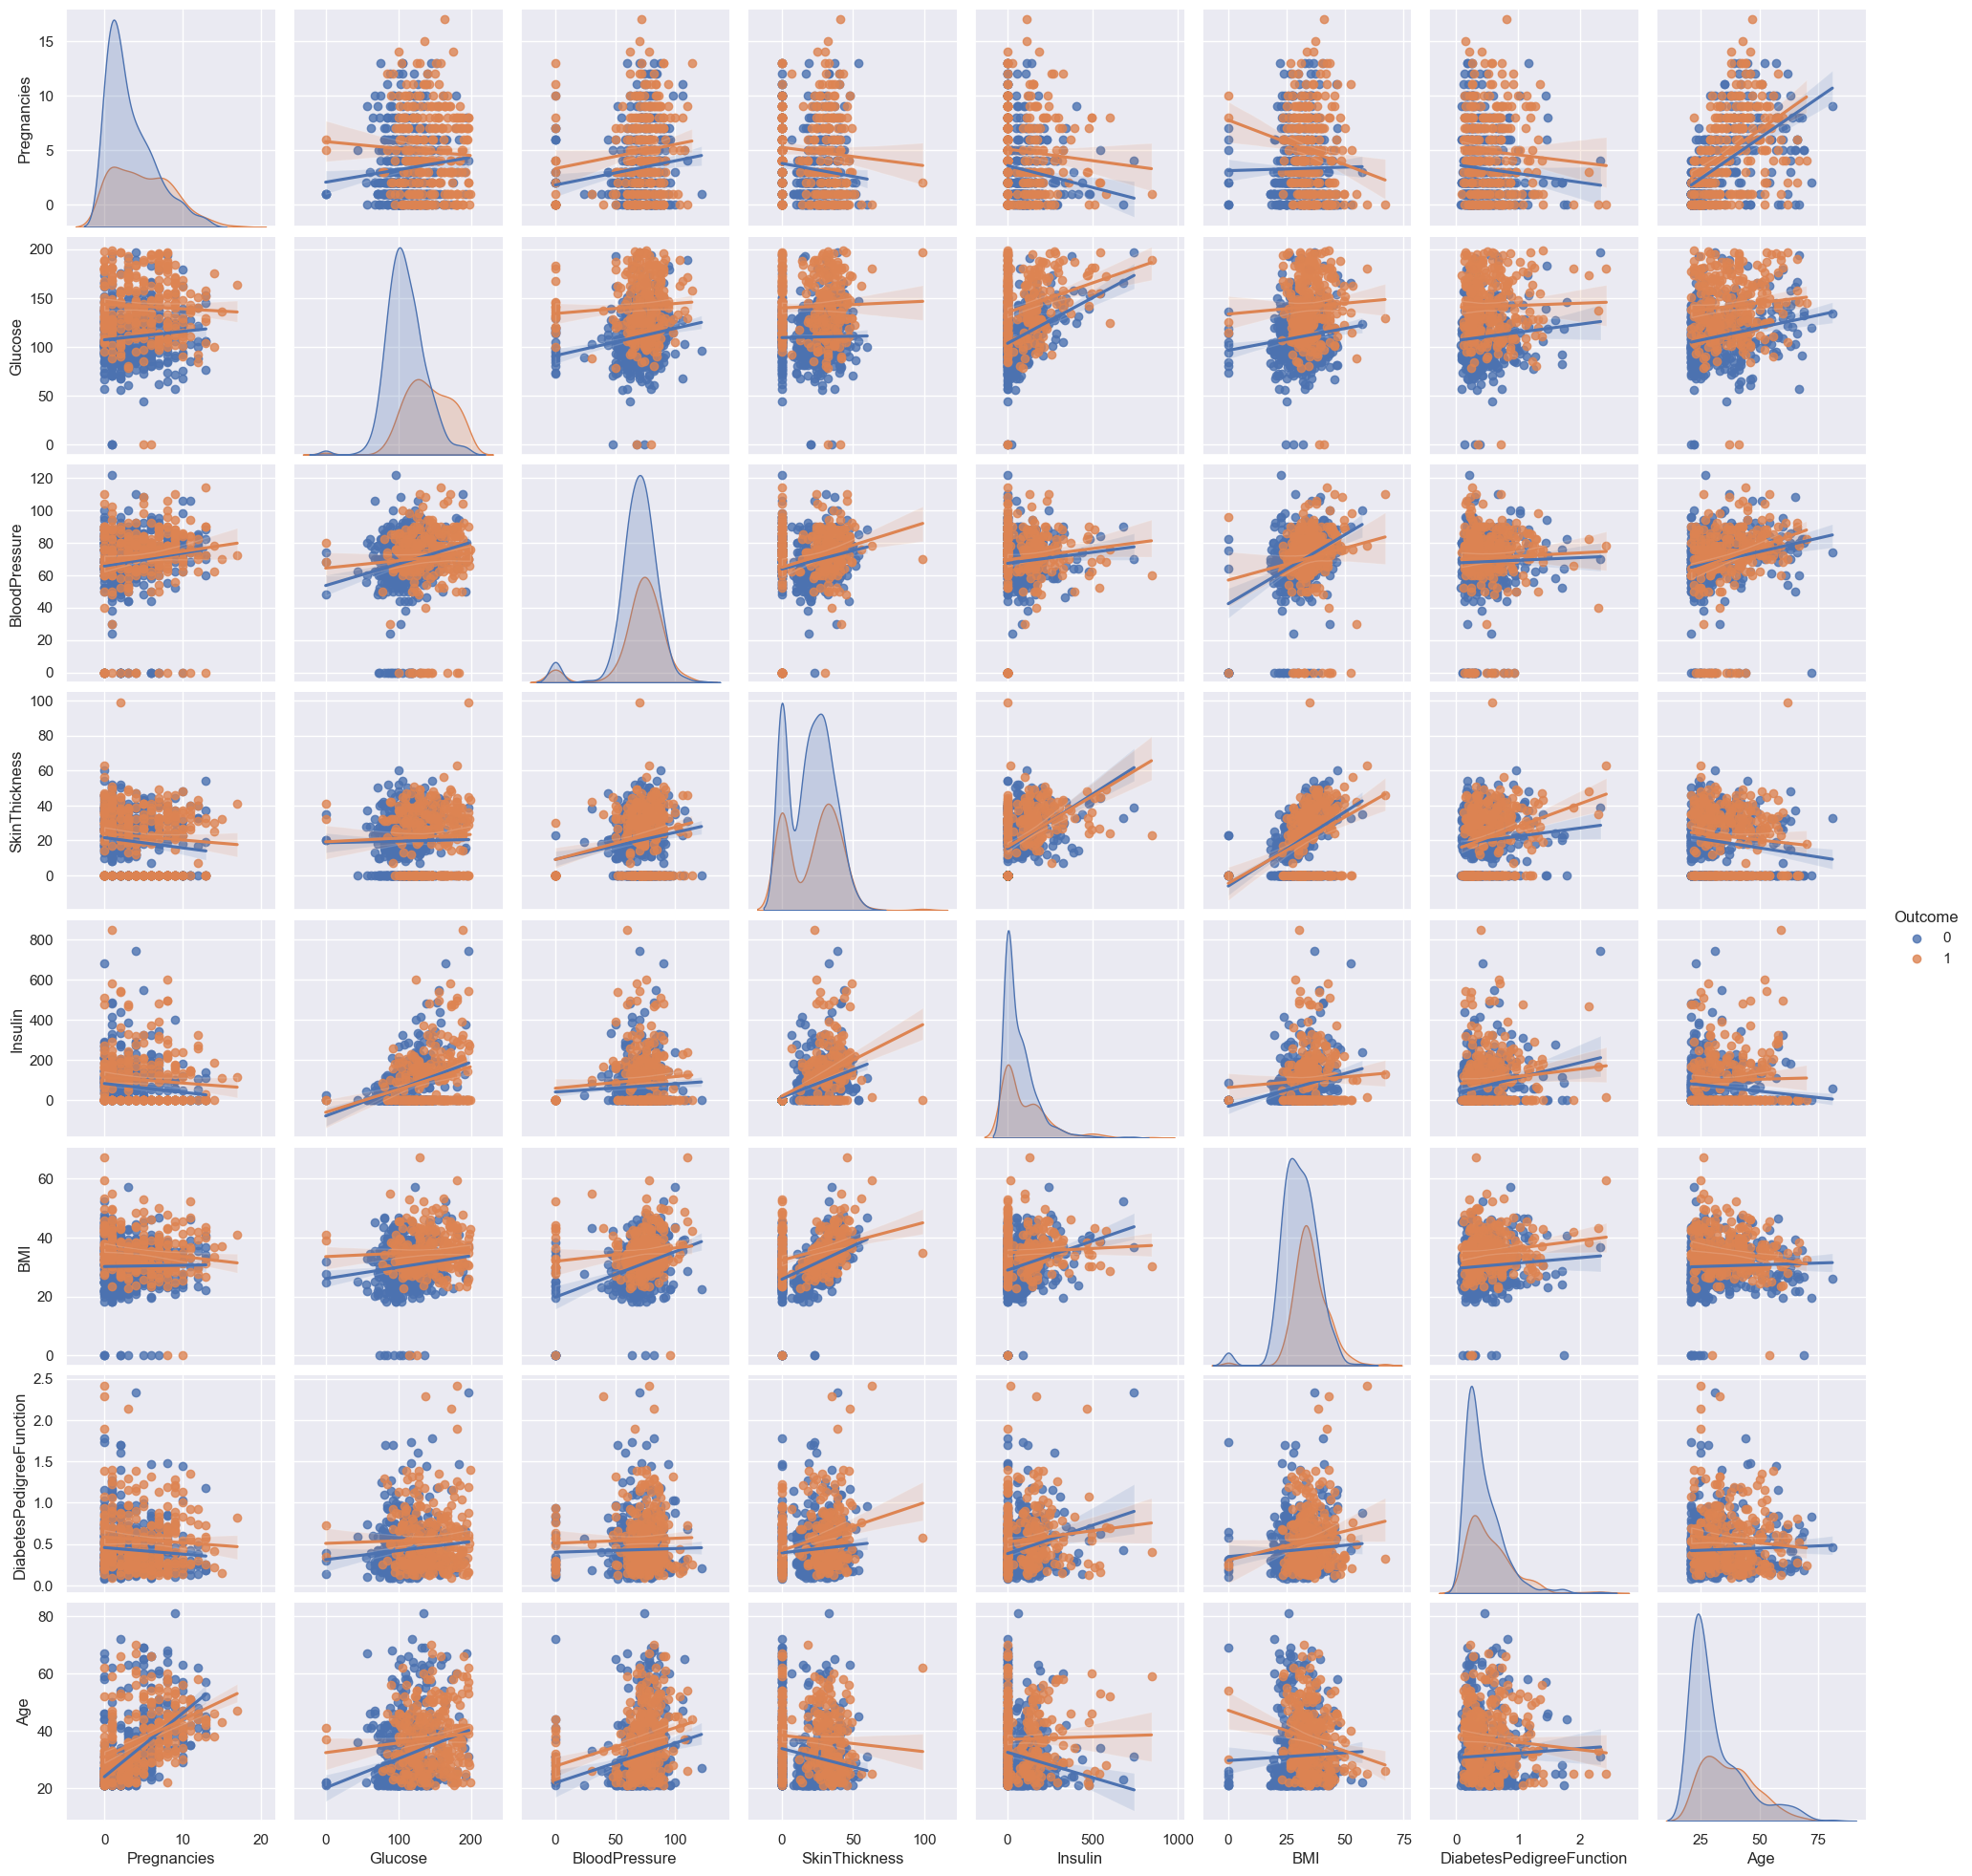

In [10]:
# Correlation pairplot
sns.set()
sns.pairplot(df, hue='Outcome', kind='reg')

In [11]:
print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique values for categorical columns:


<Axes: >

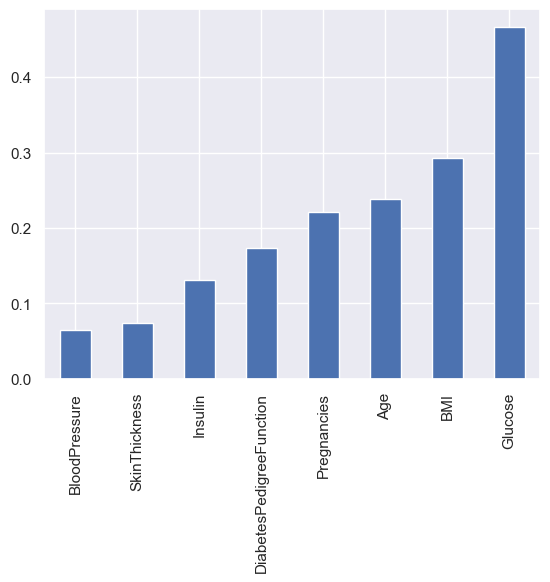

In [15]:
#Plot correlation between the variables and Diabetes_binary
df.corr()['Outcome'][:-1].sort_values().plot(kind='bar')

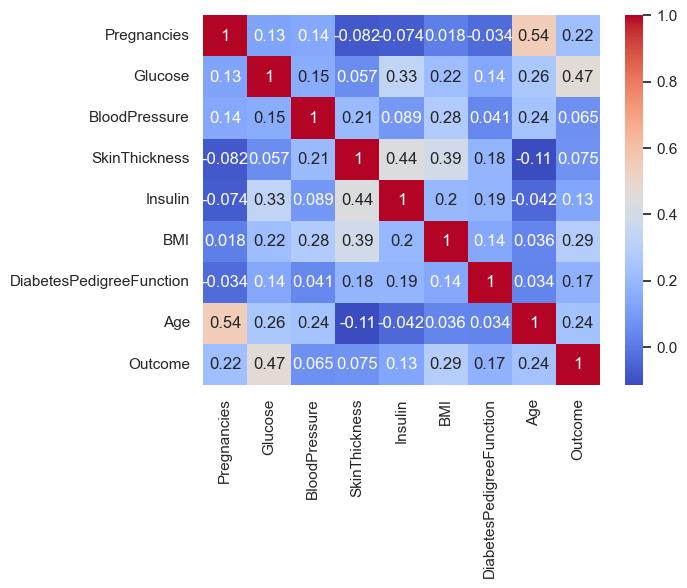

In [34]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

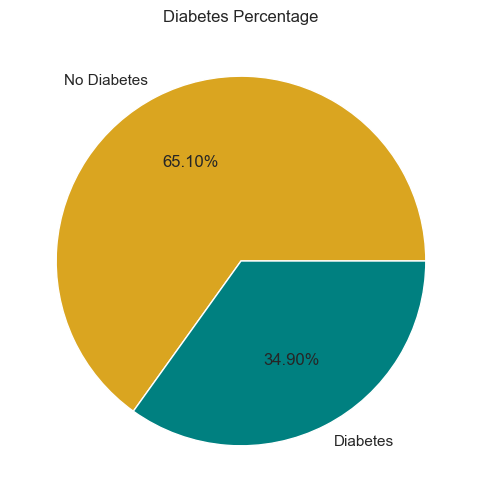

In [12]:
plt.figure(figsize=(10,6))
plt.pie(df['Outcome'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%', colors=['goldenrod', 'teal'])
plt.title('Diabetes Percentage')
plt.show()

In [37]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     102
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

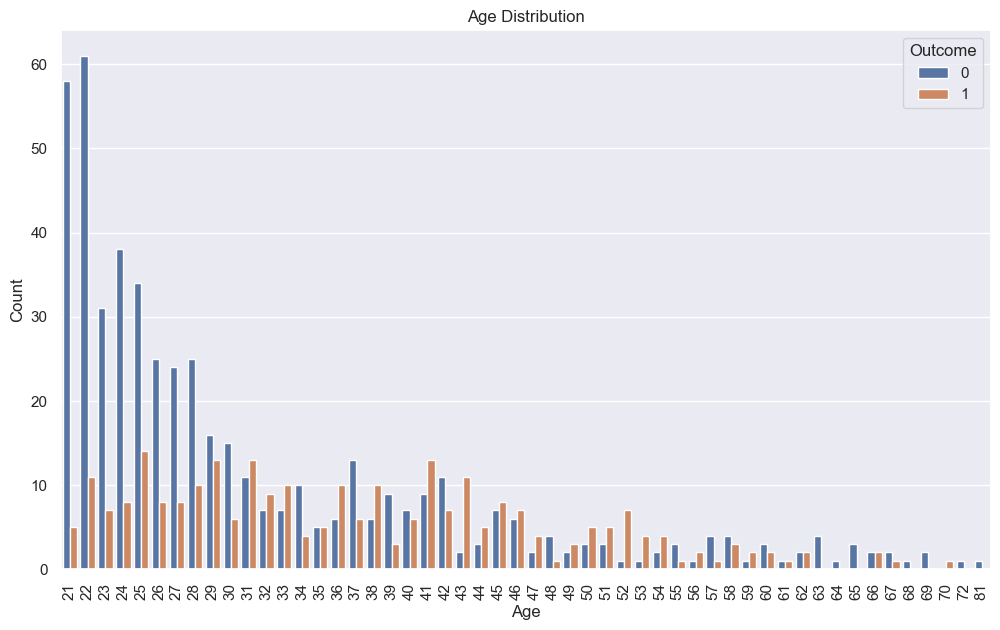

In [17]:
# Age group distribution
plt.figure(figsize=(12,7))
sns.countplot(x='Age', data=df, hue='Outcome')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

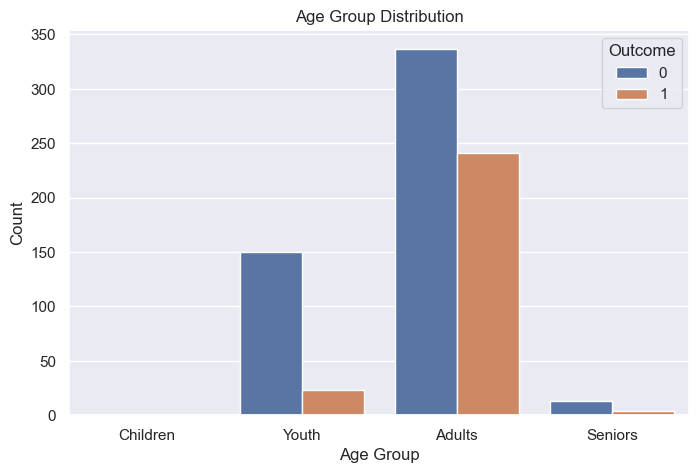

In [20]:
new_df=df.copy()
age_bins = [0, 14, 24, 64, 150]
age_labels = ['Children', 'Youth', 'Adults', 'Seniors']
new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=age_bins, labels=age_labels, right=False)
plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', data=new_df, hue='Outcome', order=age_labels)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotation set to 0 for horizontal labels
plt.show()

Skewness Value : 1.1295967011444805


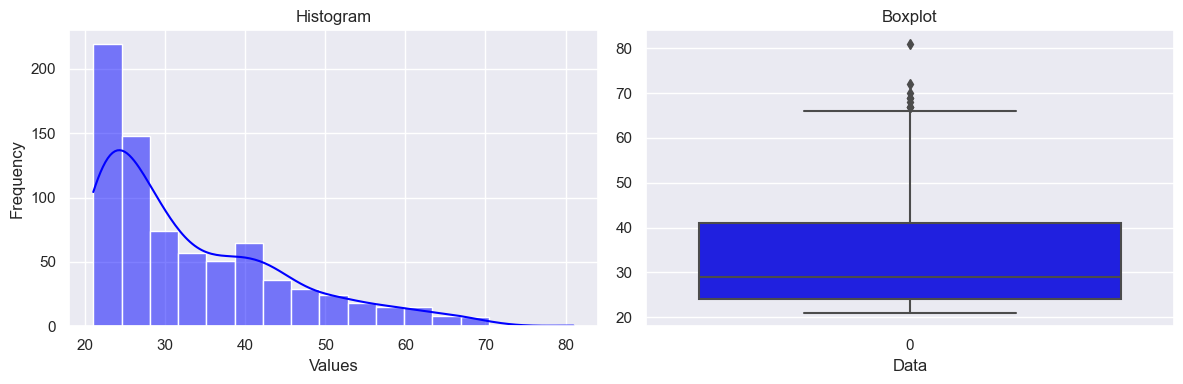

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Age'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Age'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Age'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.17375350179188992


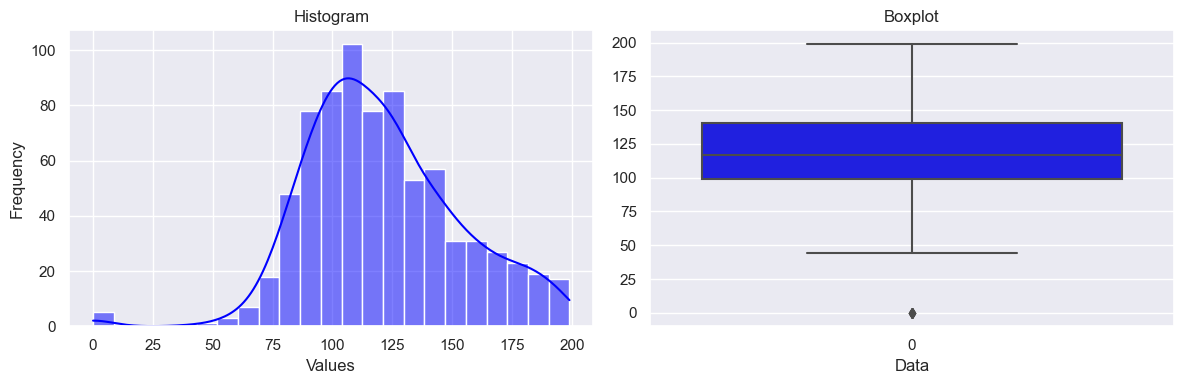

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Glucose'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Glucose'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Glucose'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : -1.8436079833551302


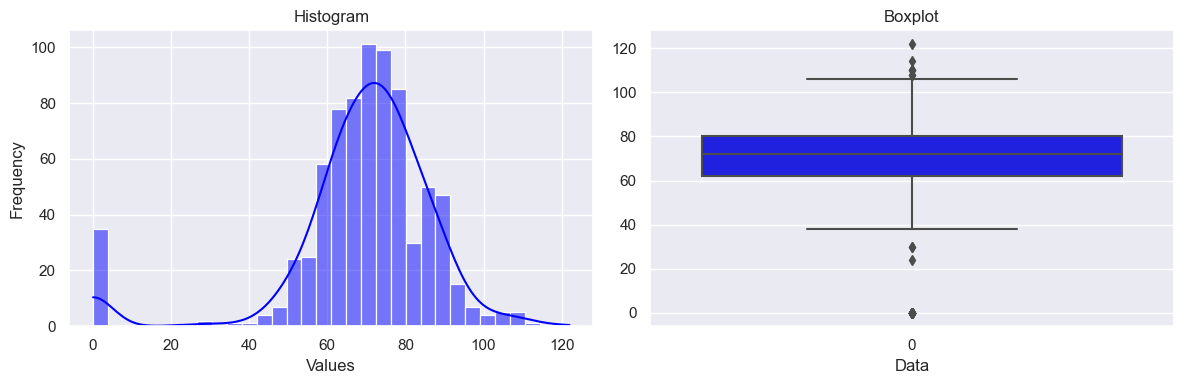

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['BloodPressure'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['BloodPressure'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['BloodPressure'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.10937249648187608


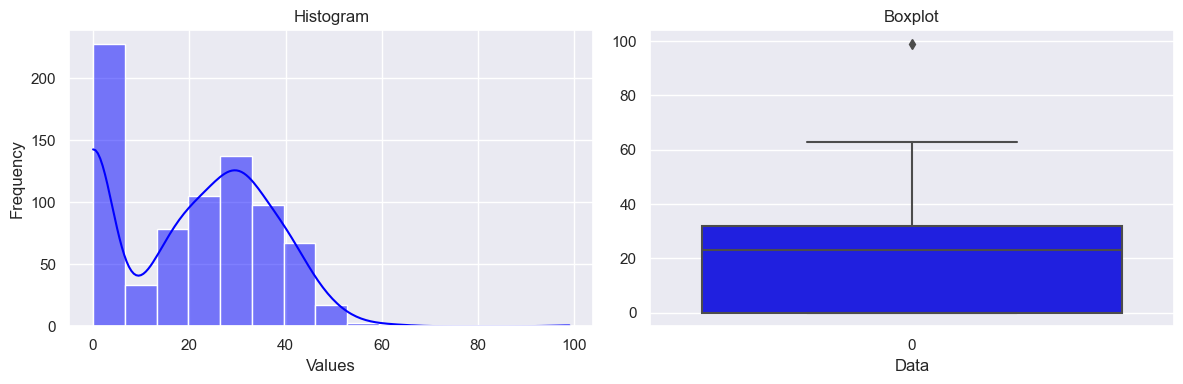

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['SkinThickness'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['SkinThickness'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['SkinThickness'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : -0.42898158845356543


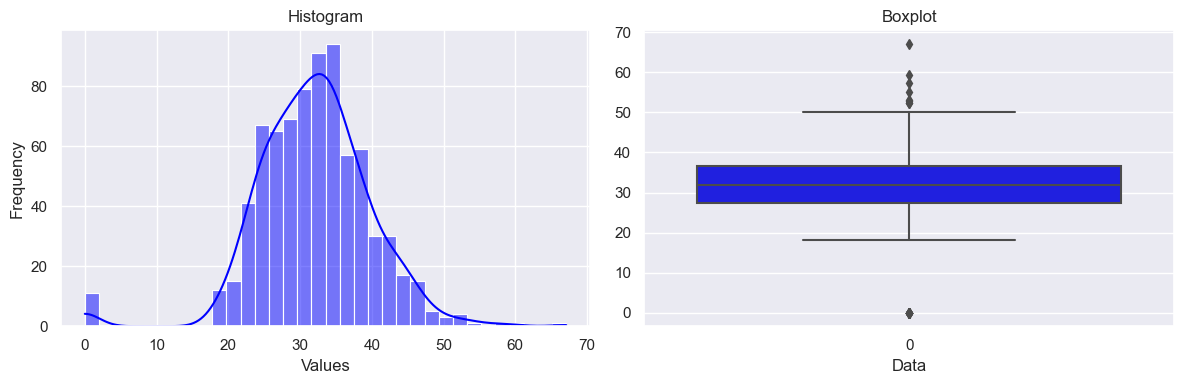

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['BMI'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['BMI'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['BMI'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 2.272250858431574


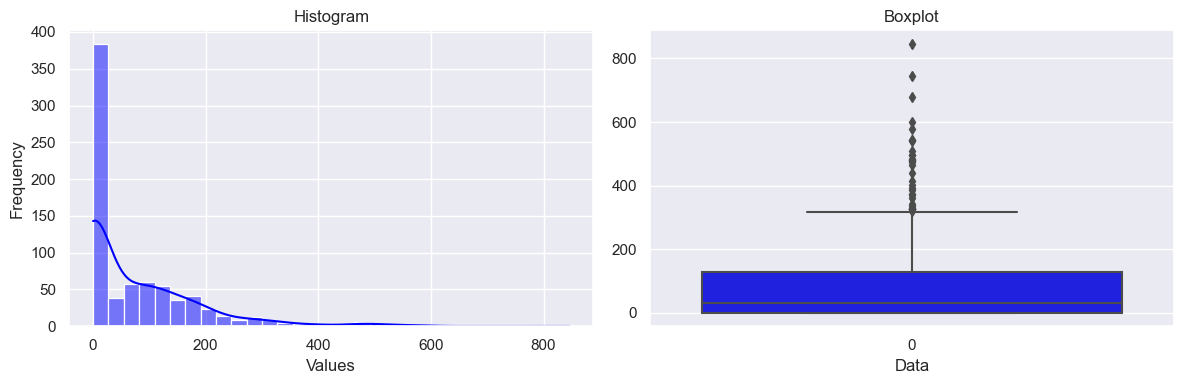

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Insulin'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Insulin'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Insulin'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Skewness Value : 0.899686638752781


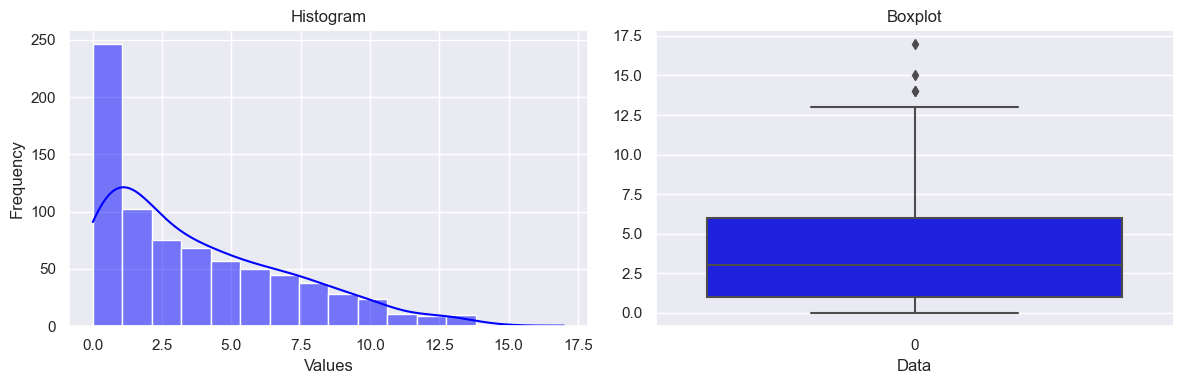

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
print("Skewness Value :",df['Pregnancies'].skew())
# Plot the histogram on the first subplot
sns.histplot(df['Pregnancies'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Plot the boxplot on the second subplot
sns.boxplot(df['Pregnancies'], color='blue', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Data')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [9]:
df[df['SkinThickness']>90]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1

In [10]:
df.drop(579,inplace=True)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Model Building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Logistic Regression

In [14]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.768352365415987
Test Accuracy Score : 0.7922077922077922
Cross validation Score : 0.7757490875137933
confusion matrix :
 [[90 14]
 [18 32]]
classification Report :
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.70      0.64      0.67        50

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



# KNN

In [15]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)




model=KNeighborsClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8221859706362153
Test Accuracy Score : 0.7467532467532467
Cross validation Score : 0.7222986164162635
confusion matrix :
 [[87 17]
 [22 28]]
classification Report :
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       104
           1       0.62      0.56      0.59        50

    accuracy                           0.75       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.75      0.74       154



# Support Vector Machine (SVM)

In [16]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)


model=SVC()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8156606851549756
Test Accuracy Score : 0.7987012987012987
Cross validation Score : 0.7523385111620405
confusion matrix :
 [[91 13]
 [18 32]]
classification Report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.71      0.64      0.67        50

    accuracy                           0.80       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.80      0.80       154



# Decision Tree Classifier

In [17]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=DecisionTreeClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.7532467532467533
Cross validation Score : 0.6989135047958577
confusion matrix :
 [[81 23]
 [15 35]]
classification Report :
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       104
           1       0.60      0.70      0.65        50

    accuracy                           0.75       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.77      0.75      0.76       154



# Randome Forest classifier

In [18]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=RandomForestClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.7987012987012987
Cross validation Score : 0.767990832696715
confusion matrix :
 [[89 15]
 [16 34]]
classification Report :
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       104
           1       0.69      0.68      0.69        50

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



# Ada boost Classifier

In [19]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=AdaBoostClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.8172920065252854
Test Accuracy Score : 0.7922077922077922
Cross validation Score : 0.7497665732959851
confusion matrix :
 [[88 16]
 [16 34]]
classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.68      0.68      0.68        50

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



# Gradient Boost Classifier

In [20]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=GradientBoostingClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.9200652528548124
Test Accuracy Score : 0.7857142857142857
Cross validation Score : 0.7718444953739072
confusion matrix :
 [[87 17]
 [16 34]]
classification Report :
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       104
           1       0.67      0.68      0.67        50

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154



# Exstrem gradient boosting Classifier (XGB)

In [21]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

"""
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=XGBClassifier()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 1.0
Test Accuracy Score : 0.7272727272727273
Cross validation Score : 0.741897971309736
confusion matrix :
 [[81 23]
 [19 31]]
classification Report :
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       104
           1       0.57      0.62      0.60        50

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



# hence we choose Logistic regresion as final model

In [22]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

"""
pca=PCA(0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

"""



model=LogisticRegression()
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

acc_train=accuracy_score(y_train,ypred_train)
acc_test=accuracy_score(y_test,ypred_test)

cv_score=cross_val_score(model,x,y,cv=5)

cm=confusion_matrix(y_test,ypred_test)
cr=classification_report(y_test,ypred_test)

print("Train Accuracy Score :",acc_train)
print("Test Accuracy Score :",acc_test)
print("Cross validation Score :",cv_score.mean())
print("confusion matrix :\n",cm)
print("classification Report :\n",cr)

Train Accuracy Score : 0.768352365415987
Test Accuracy Score : 0.7922077922077922
Cross validation Score : 0.7757490875137933
confusion matrix :
 [[90 14]
 [18 32]]
classification Report :
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.70      0.64      0.67        50

    accuracy                           0.79       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [23]:
x=df.drop(columns=['Outcome','Pregnancies'],axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=42)


tf2 = ColumnTransformer([('Scaler', StandardScaler(), slice(0, 6))])
tf3=LogisticRegression()
pipe=make_pipeline(tf2,tf3)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
accuracy_score(y_pred,y_test)

0.8311688311688312

In [24]:
import pickle

In [25]:
pickle.dump(pipe,open('Diabetics.pkl','wb'))

In [27]:
Diabetics_Disease_model=pickle.load(open('Diabetics.pkl','rb'))
#test_input =[148,72,35,0,33.6,0.627,50]#output=1
test_input=[85,66,29,0,26.6,0.351,31]#output=0
test_input = np.array(test_input).reshape(1, -1)
output=Diabetics_Disease_model.predict(test_input)


if output == 1:
    print("The patient does not have Diabetics Disease.")
else:
    print("The patient has Diabetics Disease.")

The patient has Diabetics Disease.
